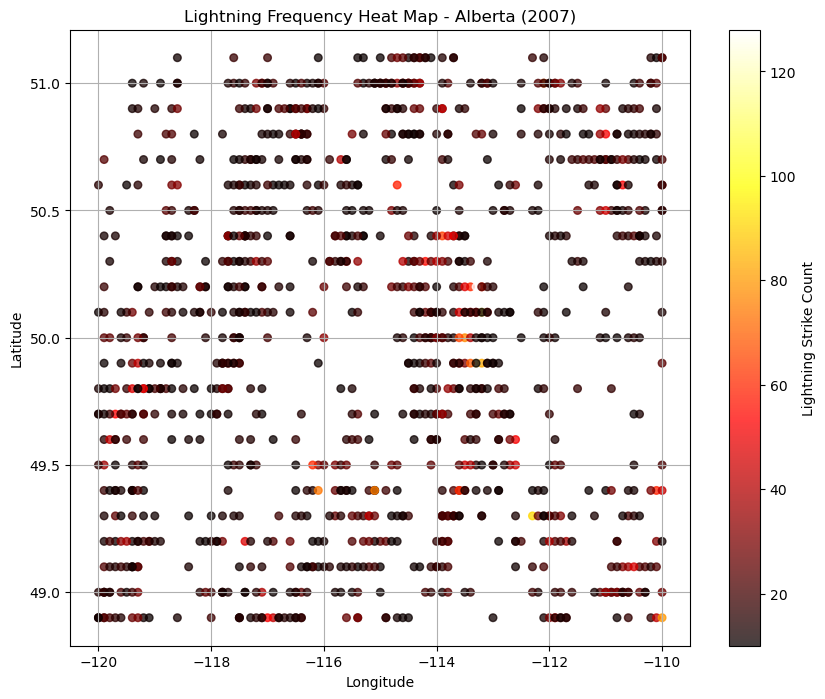

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded CSV file
file_path = 'lightning_data/nldn-tiles-2008.csv'
# Load the CSV while skipping comment lines
df = pd.read_csv(file_path, comment='#', names=["ZDAY", "CENTERLON", "CENTERLAT", "TOTAL_COUNT"])


# Display the first few rows to understand the structure
df.head()

# Read a few lines from the raw file to inspect the delimiter and structure
with open(file_path, 'r') as file:
    raw_lines = [next(file) for _ in range(10)]

raw_lines


# Alberta approximate bounding box (in degrees)
alberta_bounds = {
    "lat_min": 48.9,
    "lat_max": 60.0,
    "lon_min": -120.0,
    "lon_max": -110.0
}

# Filter data within Alberta
df_alberta = df[
    (df["CENTERLAT"] >= alberta_bounds["lat_min"]) &
    (df["CENTERLAT"] <= alberta_bounds["lat_max"]) &
    (df["CENTERLON"] >= alberta_bounds["lon_min"]) &
    (df["CENTERLON"] <= alberta_bounds["lon_max"]) &
    (df["TOTAL_COUNT"] >= 10)
]

# Create the heat map
plt.figure(figsize=(10, 8))
plt.scatter(df_alberta["CENTERLON"], df_alberta["CENTERLAT"],
            c=df_alberta["TOTAL_COUNT"], cmap='hot', s=30, alpha=0.75)
plt.colorbar(label="Lightning Strike Count")
plt.title("Lightning Frequency Heat Map - Alberta (2007)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
